In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

CARGAR EL DATASET

In [3]:
data = pd.read_excel("IA.xlsx")
print("Tamaño del dataset:", data.shape)
print(data.head())

Tamaño del dataset: (1500, 5)
   EDAD  CICLO_REGULAR  USO_ANTICONCEPTIVOS  RELACIONES_ACTIVAS  EMBARAZO
0    21              1                    0                   0         0
1    34              0                    0                   0         0
2    43              1                    1                   0         0
3    29              0                    0                   1         0
4    25              1                    0                   0         0


SELECCIONAR VARIABLES INDEPENDIENTES


In [4]:
X = data[["EDAD", "CICLO_REGULAR", "USO_ANTICONCEPTIVOS", "RELACIONES_ACTIVAS"]]


APLICAR MODELO DE CLUSTERING

In [5]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

data["Cluster"] = labels

print("\nConteo por cluster:")
print(data["Cluster"].value_counts())

data.rename(columns={"Cluster": "CLUSTER"}, inplace=True)


Conteo por cluster:
Cluster
1    758
0    742
Name: count, dtype: int64


VISUALIZACIÓN

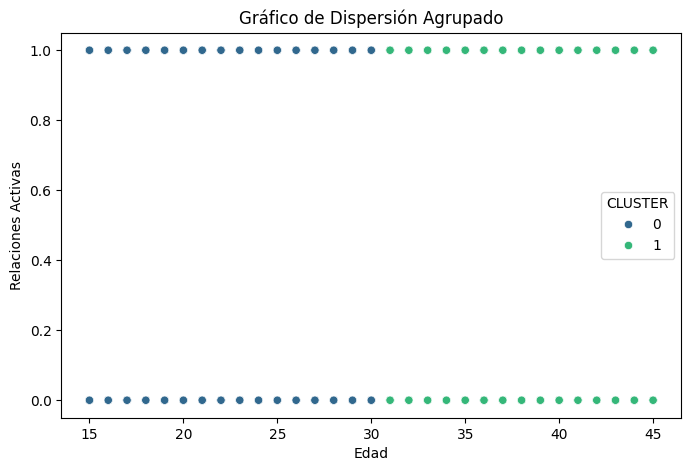

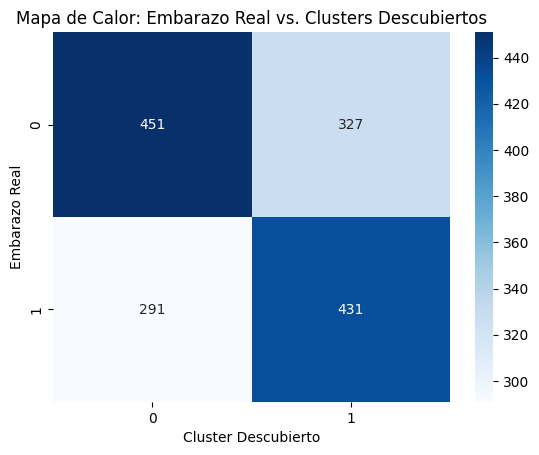


Interpretación inicial de clusters:

Cluster 0 promedio:
EDAD                   22.061995
CICLO_REGULAR           0.632075
USO_ANTICONCEPTIVOS     0.575472
RELACIONES_ACTIVAS      0.602426
EMBARAZO                0.392183
CLUSTER                 0.000000
dtype: float64

Cluster 1 promedio:
EDAD                   38.217678
CICLO_REGULAR           0.617414
USO_ANTICONCEPTIVOS     0.558047
RELACIONES_ACTIVAS      0.634565
EMBARAZO                0.568602
CLUSTER                 1.000000
dtype: float64

Cluster 2 promedio:
EDAD                  NaN
CICLO_REGULAR         NaN
USO_ANTICONCEPTIVOS   NaN
RELACIONES_ACTIVAS    NaN
EMBARAZO              NaN
CLUSTER               NaN
dtype: float64

Archivo generado: resultado_clusters.xlsx


In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["EDAD"], y=data["RELACIONES_ACTIVAS"], hue=data["CLUSTER"], palette="viridis")
plt.xlabel("Edad")
plt.ylabel("Relaciones Activas")
plt.title("Gráfico de Dispersión Agrupado")
plt.show()

cm = confusion_matrix(data["EMBARAZO"], data["CLUSTER"])

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Cluster Descubierto")
plt.ylabel("Embarazo Real")
plt.title("Mapa de Calor: Embarazo Real vs. Clusters Descubiertos")
plt.show()


print("\nInterpretación inicial de clusters:")
for i in range(3):
    print(f"\nCluster {i} promedio:")
    print(data[data["CLUSTER"] == i].mean())
    data.to_excel("resultado_clusters.xlsx", index=False)
print("\nArchivo generado: resultado_clusters.xlsx")
